<br></br>
<br></br>
<h1><center>Summary of Data Structures 2</center></h1>
<h4><center>Fast campus</center></h4>
<br>
<div style="text-align: right"><h4>02/08/2022~##/##/2022</h4></div>
<div style="text-align: right"><h4>Juyeon Kim</h4></div>
<br></br>
<br></br>

---
---

### Hash Table

* 키(Key)에 데이터(Value)를 저장하는 데이터 구조
* 파이썬의 dict도 해쉬테이블 구조로 구현됨


**장점**

전체 데이터를 검색할 필요없이, 키를 해쉬함수에 넣으면 데이터가 저장된 위치가 나온다

데이터 저장/읽기 속도가 정만 빠르다

키에 대한 데이터가 있는지|중복되었는지 확인이 쉬움

**단점**

저장공간이 많이 필요하다. 사진 01과 같이 사용되지 않는 저장공간 1,2까지 해쉬 테이블에 같이 만들어짐. 

키에 해당하는 주소가 동일할 경우 충돌(collision)을 해결하기 위한 별도의 자료구조가 필요함. eg. Andy & Anthony는 같은 키 값을 가짐. 이는 저장하는 공간을 늘리고 & 키를 겹치지 않게 저장할 수 있도록하는 해시 함수를 바꾸면 해결할 수 있다. == tradeoff btw storage & searching time

**주요 용도**
- 검색이 많이 필요할 때
- 저장, 삭제, 읽기가 빈번
- 웹사이트 캐쉬 구현 (이미 불러온 이미지|데이터 저장)

**Terminology**

해쉬란? 아무런 임의의 값을 특정한 임의의 길이로 변환하는 행위. <br>
그 해쉬 및 함수를 입력했을 때 나오는 주소까지 저장하는 공간? 해쉬 테이블. <br>
슬록? 각각의 데이터를 저장하는 박스. <br>

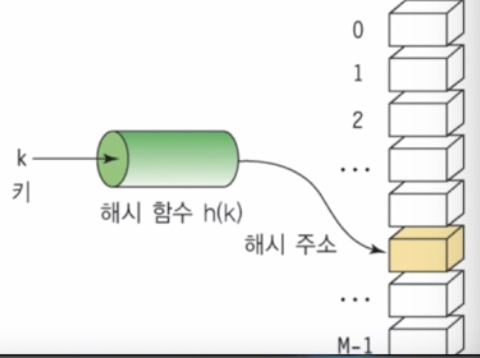

바로 데이터를 읽고 -> 키 데이터를 검색하고 -> 바로 해쉬 함수를 돌려 -> 데이터가 저장된 위치를 바로 알 수 있고 -> 해쉬테이블에서 바로 데이터를 찾아가져올 수 있다. 

**예제: 해쉬테이블 구현**

'''
hash
'''

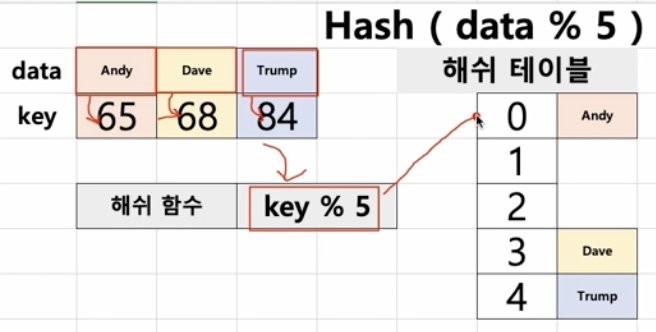

<center>사진 01. 해쉬테이블</center>

In [ ]:
# (1) 키를 저장할 주소로 변환하는 방법: 데이터 첫글자를 아스키코드로 설정. 

# 해쉬테이블 만들기
hash_table = [i for i in range(10)]
hash_table

# 해쉬함수 만들기 (가장 간단한 방법)
def hash_fuc(key):
    return key % 5

# 키
data1 = 'Andy'
data2 = 'Dave'
data3 = 'Trump'
data4 = 'Anthor'

# 해쉬테이블에 데이터 저장
def storage_data(data, value):
    # 키를 저장할 주소(인덱스)로 변환
    key_asc = ord(data[0])
    hash_address = hash_fuc(key_asc)
    
    # 주소(인덱스)에 데이터 저장
    hash_table[hash_address] = value
    
# 해쉬테이블 데이터 불러오기    
def get_data(data):
    key = ord(data[0])
    hash_address = hash_fuc(key)
    return hash_table[hash_address]

storage_data('Andy', '01055553333')
storage_data('Dave', '01044443333')
storage_data('Trump', '01022223333')
get_data('Andy')

In [ ]:
# (2) 키를 저장할 주소로 변환하는 방법: 파이썬 내장 함수 hash 사용 
# hash 모듈 이외에도 유명한 해쉬 함수들이 있음: SHA(Secure Hash Algorithm, 안전한 해시 알고리즘)
# 어떤 데이터도 유일한 고정된 크기의 고정값을 리턴해주므로, 해쉬 함수로 유용하게 활용 가능

hash_table = [i for i in range(10)]

def get_key(data): # 데이터마다 고유한 숫자 리턴 
    return hash(data) # data:=딕셔너리에서 키라고 부르는 값

def hash_func(key): # 키라고 부르는 값의 주소 리턴 
    return key % 8 

def save_data(data, value):
    hash_address = hash_func(get_key(data))
    hash_table[hash_address] = value
    
def read_data(data):
    hash_address = hash_func(get_key(data))
    return hash_table[hash_address]

save_data('juyeon', '01084202343')
save_data('sunhee', '01026392348')

**Hash collision을 해결하는 기법들**

1. Chaining 기법 (==Open Hashing)
- 충돌이 일어나면, 링크드 리스트를 위한 추가적인 공간을 확보하여 그곳에 저장하여 해결. 

In [28]:
hash_table = [0 for i in range(10)] # 데이터 자체를 hash key & value 쌍으로 저장
# 충돌 해결 기법으로 여기선 링크드 리스트 대신 그냥 리스트 사용

def get_key(data):
    return hash(data)


def hash_func(key):
    return key % 8 


def save_data(data, value):
    key_idx = get_key(data)
    hash_address = hash_func(key_idx)
        
    if hash_table[hash_address] != 0: # 저장된 데이터가 있다면 
        for idx in range(len(hash_table[hash_address])):
            if hash_table[hash_address][0] == key_idx:
                hash_table[hash_address][1] = value
                return
        hash_table[hash_address].append([key_idx, value]) 
    else: 
        hash_table[hash_address] = [[key_idx, value]]
        
        
def read_data(data):
    key_idx = get_key(data)
    hash_address = hash_func(key_idx)
    return hash_table[hash_address]


save_data('Dalta', '01084202343')
save_data('Dobee', '01026392348')
save_data('Minions', '01026392348')

In [29]:
print(hash('Dalta')%8)
print(hash('Dobee')%8)
print(hash('Minions')%8)

1
1
2


In [31]:
hash_table

[0,
 [[-3058670222071241687, '01084202343'], [4096919221037577185, '01026392348']],
 [[-7410802341938769342, '01026392348']],
 0,
 0,
 0,
 0,
 0,
 0,
 0]


2. Linear Probing 기법 (Close Hashing 폐쇠 해슁 중 하나)
- 해쉬테이블 안에서 빈공간을 찾아서 데이터를 저장하자
- 저장공간의 활용도를 높일 수 있음
- 사진 02에서 Andy와 Anthor은 같은 주소값 1을 가짐. 중복 충돌을 해결하기 위해, 1에 데이터가 들어가 있으면 해쉬 테이블에서 그 다음 인덱스의 빈공간인 2를 찾아 그곳에 value를 저장하도록 코딩. 단 어떤 값이 원래 인덱스값에 해당해서 저장된 것인지 같은 인덱스에 값이 이미 들어가 있어서 다음 저장된 것인지 구분하기 위해 키값 / value값을 리스트 형태로 같이 저장한다. 

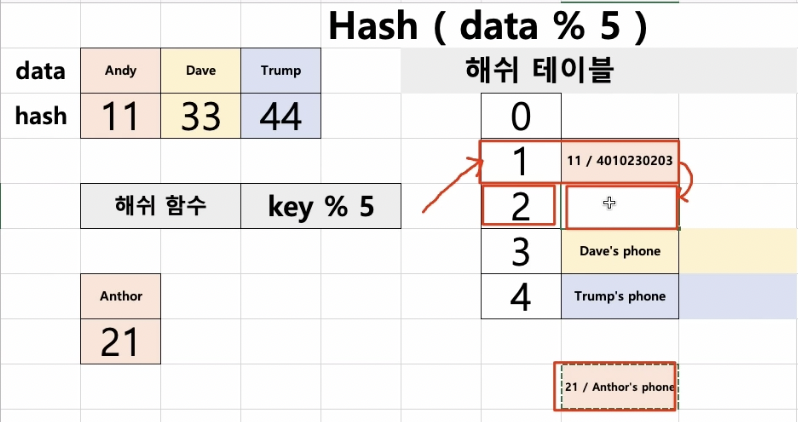

<center>사진 02. 해쉬테이블 Linear probing 기법</center>

In [53]:
hash_table = [0 for i in range(10)] # 데이터 자체를 hash key & value 쌍으로 저장
# 충돌 해결 기법으로 여기선 링크드 리스트 대신 그냥 리스트 사용

def get_key(data):
    return hash(data)


def hash_func(key):
    return key % 8 


def save_data(data, value):
    key_idx = get_key(data)
    hash_address = hash_func(key_idx)
    if hash_table[hash_address] != 0: # 저장된 데이터가 있다면 
        for idx in range(hash_address, len(hash_table)):
            if hash_table[idx] == 0:
                hash_table[idx] = [key_idx, value]
                return
    else: 
        hash_table[hash_address] = [key_idx, value]
        
        
def read_data(data):
    key_idx = get_key(data)
    hash_address = hash_func(key_idx)
    
    if hash_table[hash_address] != 0:
        for idx in range(hash_address, len(hash_table)):
            if hash_table[idx] == 0: # 충돌이 일어나면 다음 빈 데이터에 값이 저장되도록 되어있음. 
                return None # 그 말은 즉슨, 다음의 빈 데이터에 데이터가 한번도 저장된 적이 없다면, 그 값은 저장된 적이 없는 것임. 
            elif hash_table[idx][0] == key_idx:
                return hash_table[idx][1]
    else:
        return None


In [54]:
print(hash('minions') % 6)
print(hash('gru') % 6)
print(hash('juyeon') % 6)

3
4
4


In [55]:
save_data('minions', '01084202343')
save_data('gru', '01026392348')
save_data('juyeon', '01026392348')

In [56]:
hash_table

[0,
 [-3317628523604557095, '01084202343'],
 [4198402459764844978, '01026392348'],
 0,
 [196878331992572068, '01026392348'],
 0,
 0,
 0,
 0,
 0]

In [57]:
read_data('gru')

'01026392348'

파이썬 내장 hash 모듈 외에도 사용할 수 있는 해슁기법: SHA(Secure Hash Algorithm). 실행할 때마다 값이 바뀌는 hash 모듈과 달리 어떤 데이터도 유일한 고정된 크기의 값으로 리턴해줌. 

In [66]:
import hashlib

data = 'juyeon'.encode()
hash_object = hashlib.sha1()
# hash_object = hashlib.sha256()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print (int(hex_dig,16)) # 16진수 -> 10진수로 변환

686211612680411467058427104447617489642158282404


**시간 복잡도**
- 일반적인 경우(Collision이 없는 경우)는 O(1)
- 최악의 경우(Collision이 모두 발생하는 경우)는 O(n)

> 해쉬 테이블의 경우, 일반적인 경우를 기대하고 만들기 때문에, 시간 복잡도는 O(1) 이라고 말할 수 있음

---
---

### Tree

<img src="http://www.fun-coding.org/00_Images/tree.png" width="600" />

**이진 트리와 이진 탐색 트리 (Binary Search Tree)**
- 이진 트리: 노드의 최대 Branch가 2인 트리
- 이진 탐색 트리 (Binary Search Tree, BST): 이진 트리에 다음과 같은 추가적인 조건이 있는 트리
  - 왼쪽 노드는 해당 노드보다 ***작은 값***, 오른쪽 노드는 해당 노드보다 ***큰 값***을 가지고 있음! 
  
**트리 파이썬 객체지향+링크드리스트로 구현**

In [186]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

        
class NodeMgmt:
    def __init__(self, head):
        self.head = head
        
    def insert(self, value):
        self.current_node = self.head
        while True:
            if value < self.current_node.value:
                if self.current_node.left == None:
                    self.current_node.left = Node(value)
                    break
                else:
                    self.current_node = self.current_node.left
            else:
                if self.current_node.right == None:
                    self.current_node.right = Node(value)
                    break
                else:
                    self.current_node = self.current_node.right
                    
    def search(self, value):
        self.current_node = self.head
        while self.current_node:
            if self.current_node.value == value:
                return True
            elif value < self.current_node.value:
                self.current_node = self.current_node.left
            else:
                self.current_node = self.current_node.right
        return False

In [187]:
head = Node(1)
BST = NodeMgmt(head)
BST.insert(2)
BST.insert(3)
BST.insert(0)
BST.insert(4)
BST.insert(8)

In [189]:
BST.search(8)

True

#### 5.4. 이진 탐색 트리 삭제 
* 매우 복잡함. **경우를 나누어서 이해하는 것이 좋음**

#### 5.4.1. Leaf Node 삭제 
* Leaf Node: Child Node 가 없는 Node
* 삭제할 Node의 Parent Node가 삭제할 Node를 가리키지 않도록 한다. 
<img src="http://www.fun-coding.org/00_Images/tree_remove_leaf.png" width="800" />

#### 5.4.2. Child Node 가 하나인 Node 삭제 
* 삭제할 Node의 Parent Node가 삭제할 Node의 Child Node를 가리키도록 한다.
<img src="http://www.fun-coding.org/00_Images/tree_remove_1child.png" width="800" />

#### 5.4.3. Child Node 가 두 개인 Node 삭제
방법1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**

방법2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
<img src="http://www.fun-coding.org/00_Images/tree_remove_2child.png" width="800" />

##### 5.4.3.1. 삭제할 Node의 오른쪽 자식중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키게 할 경우
- 삭제할 Node의 오른쪽 자식 선택
- 오른쪽 자식의 가장 왼쪽에 있는 Node를 선택
- 해당 Node를 삭제할 Node의 Parent Node의 왼쪽 Branch가 가리키게 함
- 해당 Node의 왼쪽 Branch가 삭제할 Node의 왼쪽 Child Node를 가리키게 함
- 해당 Node의 오른쪽 Branch가 삭제할 Node의 오른쪽 Child Node를 가리키게 함
- 만약 해당 Node가 오른쪽 Child Node를 가지고 있었을 경우에는, 해당 Node의 본래 Parent Node의 왼쪽 Branch가 해당 오른쪽 Child Node를 가리키게 함

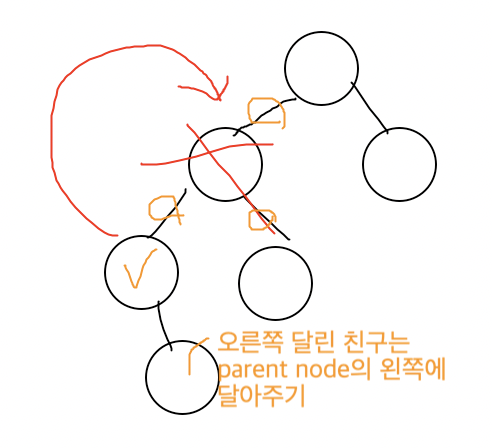

In [197]:
def delete(self, head, value):

    # 삭제할 노드 & 삭제할 노드의 parent 노드 찾기 
    self.current_node = self.head
    self.parent_node = self.head
    searched = False

    while self.current_node:
        if self.current_node.value == value:
            searched = True
            break
        elif value < self.current_node.value:
            self.parent_node =self.current_node
            self.current_node = self.current_node.left
        else:
            self.parent_node =self.current_node
            self.current_node = self.current_node.right

    if not searched:
        return False

    # Case by Case로 Divide and Conquer!
    # (1) 삭제하려는 Node 가 leaf node인 경우
    if self.current_node.left == None and self.current_node.right == None:
        if value < self.parent_node.value:
            self.parent_node.left = None
        else:
            self.parent_node.right = None

    # (2) 삭제할 node가 child node를 한 개 가지고 있는 경우 (그림을 그려서 작성)
    if self.current_node.left != None and self.current_node.right == None:
        if self.current_node.value < value:
            self.parent_node.left = self.current_node.left
        else:
            self.parent.right = self.current_node.left
    elif self.current_node.left == None and self.current_node.right != None:
        if self.current_node.value < value:
            self.parent_node.left = self.current_node.right
        else:
            self.parent_node.right = self.current_node.right    

    # (3) 삭제할 노드가 child node 두 개 이상 가지고 있는 경우 
    if self.current_node.left != None and self.current_node.right != None:
        if value < self.parent_node.value: # 삭제하려는 노드가 왼쪽에 위치
            # 삭제하려는 노드의 오른쪽 브랜치에서 가장 작은 값을 찾기
            self.change_node = self.current_node.right # 초기화
            self.change_node_parent = self.current_node.right 
            while self.change_node.left:
                self.change_node_parent = self.change_node
                self.change_node = self.change_node.left

            if self.change_node.right: # 올리려는 노드의 오른쪽 자식이 있다면, 부모 노드의 왼쪽으로 붙여줌
                self.change_node_parent.left = self.change_node.right
            else:
                self.change_node_parent.left = None # 없다면 고리 끊기

            self.parent_node.left = self.change_node 
            self.change_node.left = self.current_node.left
            self.change_node.right = self.current_node.right

        else:
            self.change_node = self.current_node.right
            self.change_node_parent = self.current_node.right
            while self.change_node.left:
                self.change_node_parent = self.change_node
                self.change_node = self.change_node.left
            if self.change_node.right:
                self.change_node_parent.left = self.change_node.right
            else:
                self.change_node_parent.left = None
            self.parent_node.right = self.change_node # the only difference
            self.change_node.left = self.current_node.left
            self.change_node.right = self.current_node.right

* **Complete Binary Tree Class**

In [238]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

        
class NodeMgmt:
    def __init__(self, head):
        self.head = head
        
    def insert(self, value):
        self.current_node = self.head
        while True:
            if value < self.current_node.value:
                if self.current_node.left == None:
                    self.current_node.left = Node(value)
                    break
                else:
                    self.current_node = self.current_node.left
            else:
                if self.current_node.right == None:
                    self.current_node.right = Node(value)
                    break
                else:
                    self.current_node = self.current_node.right
                    
    def search(self, value):
        self.current_node = self.head
        while self.current_node:
            if self.current_node.value == value:
                return True
            elif value < self.current_node.value:
                self.current_node = self.current_node.left
            else:
                self.current_node = self.current_node.right
        return False

    def delete(self, head, value):

        # 삭제할 노드 & 삭제할 노드의 parent 노드 찾기 
        self.current_node = self.head
        self.parent_node = self.head
        searched = False

        while self.current_node:
            if self.current_node.value == value:
                searched = True
                break
            elif value < self.current_node.value:
                self.parent_node =self.current_node
                self.current_node = self.current_node.left
            else:
                self.parent_node =self.current_node
                self.current_node = self.current_node.right

        if not searched:
            return False

        # Case by Case로 Divide and Conquer!
        # (1) 삭제하려는 Node 가 leaf node인 경우
        if self.current_node.left == None and self.current_node.right == None:
            if value < self.parent_node.value:
                self.parent_node.left = None
            else:
                self.parent_node.right = None

        # (2) 삭제할 node가 child node를 한 개 가지고 있는 경우 (그림을 그려서 작성)
        if self.current_node.left != None and self.current_node.right == None:
            if self.current_node.value < value:
                self.parent_node.left = self.current_node.left
            else:
                self.parent.right = self.current_node.left
        elif self.current_node.left == None and self.current_node.right != None:
            if self.current_node.value < value:
                self.parent_node.left = self.current_node.right
            else:
                self.parent_node.right = self.current_node.right    

        # (3) 삭제할 노드가 child node 두 개 이상 가지고 있는 경우 
        if self.current_node.left != None and self.current_node.right != None:
            if value < self.parent_node.value: # 삭제하려는 노드가 왼쪽에 위치
                # 삭제하려는 노드의 오른쪽 브랜치에서 가장 작은 값을 찾기
                self.change_node = self.current_node.right # 초기화
                self.change_node_parent = self.current_node.right 
                while self.change_node.left:
                    self.change_node_parent = self.change_node
                    self.change_node = self.change_node.left

                if self.change_node.right: # 올리려는 노드의 오른쪽 자식이 있다면, 부모 노드의 왼쪽으로 붙여줌
                    self.change_node_parent.left = self.change_node.right
                else:
                    self.change_node_parent.left = None # 없다면 고리 끊기

                self.parent_node.left = self.change_node 
                self.change_node.left = self.current_node.left
                self.change_node.right = self.current_node.right

            else:
                self.change_node = self.current_node.right
                self.change_node_parent = self.current_node.right
                while self.change_node.left:
                    self.change_node_parent = self.change_node
                    self.change_node = self.change_node.left
                if self.change_node.right:
                    self.change_node_parent.left = self.change_node.right
                else:
                    self.change_node_parent.left = None
                self.parent_node.right = self.change_node # the only difference
                self.change_node.left = self.current_node.left
                self.change_node.right = self.current_node.right
                

In [248]:
# 간단한 테스트 코드

import random

# 100개 숫자 랜덤 선택
bst_nums = set()
while len(bst_nums) < 100:
    bst_nums.add(random.randint(0,9999))
    
    
# 트리에 숫자 삽입
head = Node(500)
binrary_tree = NodeMgmt(head)
for num in bst_nums:
    binrary_tree.insert(num)
    
# 입력한 100개 숫자 검색 
for num in bst_nums:
    if not binrary_tree.search(num):
        print(f"{num} not found!")
        
        
# 10개 숫자 랜덤 삭제
bst_nums = list(bst_nums)
deleted_nums = set()
while len(deleted_nums) != 10:
    deleted_nums.add(bst_nums[random.randint(0,99)])
    
    
# 선택 숫자 삭제 
for num in deleted_nums:
    binrary_tree.delete(head, num)
    # 삭제된 숫자 검색
    if binrary_tree.search(num) == False:
        print("Deletion succeeded!")

Deletion succeeded!
Deletion succeeded!
Deletion succeeded!
Deletion succeeded!
Deletion succeeded!
Deletion succeeded!
Deletion succeeded!
Deletion succeeded!


### 이진트리의 시간 복잡도

- 높이를 h라 표기할 때, 시간 복잡도는 O(h).
- 깊이가 2일 떄 노드 4개, 3일 때 노드 8개 .... 그리하여 h는 밑이 2인 log에 가까움. 따라서 일반적인 시간 복잡도는 O(logn).

== 추가: Log2n의미, 깊이가 하나씩 깊어짐에 따라 50%의 실행시간을 단축시킬 수 있다. 

- 최악의 경우 하나의 가지만 가진 리스트와 같은 형태로 표현될 수 있기 때문에 최악의 시간 복잡도는 O(n)일 수도 있다. 